<a href="https://colab.research.google.com/github/HongJeongHwan/MachineLearning/blob/main/%EC%8B%A4%EC%8A%B506%EB%B6%93%EA%BD%83%EA%B5%B0%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#§ 붓꽃데이터를 이용한 군집

In [ ]:
'''
- 군집화(클러스터링)
: 평가를 할 수 없다.

이상치 탐지의 영역도 있다.
: 보안의 영역이 될 수 있다.

군집화, 이상치 탐지등 : 마케팅이나 여론조사 등에는 비지도학습이 유용하다.

더욱 다양한 모델이 있으니 관심이 있으면 찾아보면 된다.

예측과 평가가 없기 때문에 간단하다.
'''

'\n- 군집화(클러스터링)\n: 평가를 할 수 없다.\n\n이상치 탐지의 영역도 있다.\n: 보안의 영역이 될 수 있다.\n'

In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

##■ 데이터 불러오기

In [ ]:
# 파일경로 설정
file_path = '/content/drive/MyDrive/KDT/03. 정형데이터분석시각화/02. Data파일/iris_dataset.csv'
# pd.read_csv() 사용
df_iris = pd.read_csv(file_path)
# 결과확인
print(df_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         label  
0       se

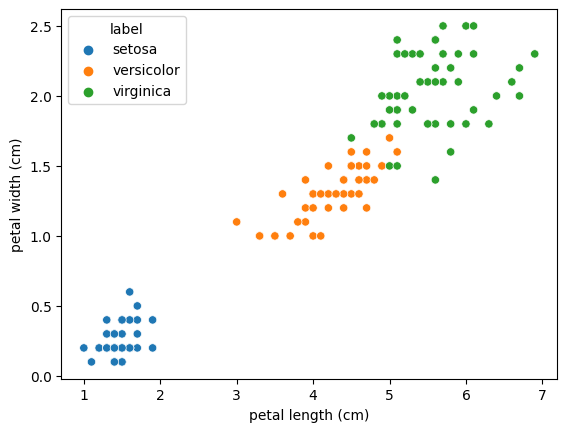

In [ ]:
# 데이터분포 시각화
sns.scatterplot(data=df_iris,x='petal length (cm)',y='petal width (cm)',hue='label')
plt.show()

In [ ]:
# 붓꽃 품종의 label을 숫자로 대체 --> label encoding 실행

# replace() 사용
# np.unique(df_iris.label)
df_iris_label = df_iris.replace({'setosa':0, 'versicolor':1, 'virginica':2})

# pd.get_dummies() 사용
df_iris_onehot = pd.get_dummies(data=df_iris,columns=['label'])

# 결과 확인하기
print(df_iris_label)
print(df_iris_onehot)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  
0        0  
1

##■ K-means 적용하기

In [ ]:
# 필요한 라이브러리 임포트
# from sklearn.cluster import KMeans

# X_data 생성
# X_data = df_iris_label.drop(columns=['sepal length (cm)','sepal width (cm)','label']) # <== 이렇게 조건을 변경하면 또 다른 결과가 나온다.
X_data = df_iris_label.drop(columns=['label'])

# 결과 확인
print(X_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


###→ 최적의 클러스터 개수 설정

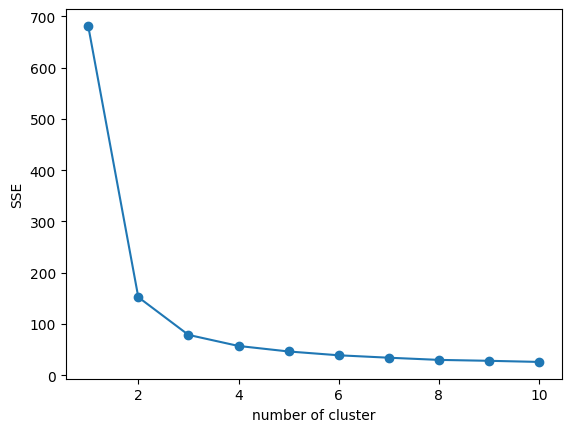

'\n최적의 클러스터를 3으로 하겠다.\n'

In [ ]:
# elbow mothod 적용

# 필요한 라이브러리 임포트
# import numpy as np

# FutureWarning 메시지 제거
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# SSE(평균제곱오차) 측정 --> inertia_
sse = []
for i in np.arange(1,11):
    # KMeans 모델생성
    model = KMeans(n_clusters=i,random_state=0)
    # 모델학습
    model.fit(X_data)
    sse.append(model.inertia_)

# 결과 확인
# print(f'sse :\n{sse}')

# 결과 시각화
plt.plot(np.arange(1,11),sse,marker='o')
plt.xlabel('number of cluster')
plt.ylabel('SSE')
plt.show()

'''
최적의 클러스터를 3으로 하겠다.
'''

###→ 3개의 군집으로 군집화

In [ ]:
# 모델 생성
model = KMeans(n_clusters=3,random_state=0)

# 모델학습 : 군집화하는것.
model.fit(X_data)

# 학습결과 확인
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
# predict : 데이터를 주면 어느 클러스터에 분류되었는지 보여주는 것.
# 3개의 군집으로 군집화한 결과 --> predict()
'''
predict하지 않아도 fit(학습)후에 model.labels_ 속성값의 확인으로 가능
'''
label = model.predict(X_data)

# 결과 확인
print(f'군집화한 결과 :\n{label}')

군집화한 결과 :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
# 모델이 예측한 label과 실제 label 비교
'''
### label의 변화
1) 기존 label 0 --> 1
2) 기존 label 1 --> 0
3) 기존 label 2 --> 2
'''
# df_iris_label2 = df_iris_label.drop(columns=['label_predict','result'])
# print(df_iris_label2)

# np.unique()

# index 0~49 --> setosa
label1 = label[0:50]
print(label1)
print(f'index 0~49 = {np.unique(ar=label1,return_counts=True)}\n')

# index 50~99 --> versicolor
label2 = label[50:100]
print(label2)
print(f'index 50~99 = {np.unique(ar=label2,return_counts=True)}\n')

# index 100~149 --> virginica
label3 = label[100:]
print(label3)
print(f'index 100~149 = {np.unique(ar=label3,return_counts=True)}\n')


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
index 0~49 = (array([1], dtype=int32), array([50]))

[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
index 50~99 = (array([0, 2], dtype=int32), array([48,  2]))

[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]
index 100~149 = (array([0, 2], dtype=int32), array([14, 36]))



In [ ]:
# 모델이 예측한 label과 실제 label 비교 : 예습한거
'''
### label의 변화
1) 기존 label 0 --> 1
2) 기존 label 1 --> 0
3) 기존 label 2 --> 2
'''
# 군집화 결과를 'label_predict' 컬럼에 저장
df_iris_label.loc[:,'label_predict'] = pd.Series(model.labels_)

# label_predict 컬럼의 값을 label 컬럼에 맞게 변경
df_iris_label.replace({'label_predict':{1:0,0:1}},inplace=True)

# label_predict 컬럼의 값을 label 컬럼을 비교연산하여 결과를 result 컬럼에 저장
df_iris_label.loc[:,'result'] = (df_iris_label.loc[:,'label'] == df_iris_label.loc[:,'label_predict'])

# 최종 정확도 확인
print(df_iris_label.result.value_counts(normalize=True))

True     0.893333
False    0.106667
Name: result, dtype: float64


In [ ]:
print(df_iris_label)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  label_predict  

##■ GMM(Gaussian Mixture Model) 적용하기

In [ ]:
# 필요한 라이브러리 임포트
from sklearn.mixture import GaussianMixture

# X_data 생성
# X_data = df_iris_label.drop(columns=['sepal length (cm)','sepal width (cm)','label']) # <== 이렇게 조건을 변경하면 또 다른 결과가 나온다.
X_data = df_iris_label.drop(columns=['label','label_predict','result'])

# 결과 확인
print(X_data)

     petal length (cm)  petal width (cm)
0                  1.4               0.2
1                  1.4               0.2
2                  1.3               0.2
3                  1.5               0.2
4                  1.4               0.2
..                 ...               ...
145                5.2               2.3
146                5.0               1.9
147                5.2               2.0
148                5.4               2.3
149                5.1               1.8

[150 rows x 2 columns]


In [ ]:
'''
# 평가지표가 없어서 GridSearchCV를 사용할 수 없다.
'''
# 모델 호출
gmm = GaussianMixture(n_components=3,random_state=0)

# 모델 학습
gmm.fit(X_data)

GaussianMixture(n_components=3, random_state=0)

In [ ]:
# 학습결과 --> 3개의 군집으로 군집화 결과 확인
cluster = gmm.predict(X_data)

print(f'군집화한 결과 :\n{cluster}\n')

군집화한 결과 :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]



In [ ]:
# 모델이 예측한 label과 실제 label 비교

# df_iris_label2 = df_iris_label.drop(columns=['label_predict','result'])
# print(df_iris_label2)

# np.unique()

# index 0~49 --> setosa
label1 = cluster[0:50]
print(label1)
print(f'index 0~49 = {np.unique(ar=label1,return_counts=True)}\n')

# index 50~99 --> versicolor
label2 = cluster[50:100]
print(label2)
print(f'index 50~99 = {np.unique(ar=label2,return_counts=True)}\n')

# index 100~149 --> virginica
label3 = cluster[100:]
print(label3)
print(f'index 100~149 = {np.unique(ar=label3,return_counts=True)}\n')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
index 0~49 = (array([0]), array([50]))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
index 50~99 = (array([1, 2]), array([ 1, 49]))

[1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
index 100~149 = (array([1, 2]), array([47,  3]))

